In [12]:
import sys
import os

# Add the modules directory to Python path
module_path = os.path.abspath(os.path.join('..', 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from financial_analyzer import (
    FinancialDataLoader, 
    TechnicalAnalyzer, 
    PortfolioAnalyzer, 
    FinancialVisualizer
)


print("Financial Analysis Demo Started...")



Financial Analysis Demo Started...


In [13]:
loader = FinancialDataLoader()

# Load the sample data
data = loader.load_from_csv('../data/yfinance_data/Data/AAPL.csv', date_col='Date', index_col='Date')

loader.validate_data()
loader.add_ticker_column("AAPL")
valid_data = loader.get_data()

print(f"Data shape: {valid_data.shape}")
print(f"Columns: {valid_data.columns.tolist()}")
valid_data.head()


Data loaded successfully. Shape: (3774, 5)
Data validated. Final shape: (3774, 5)
Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
Added ticker column: AAPL
Data shape: (3774, 6)
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']


,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2009-01-02,2.575630,2.730385,2.554037,2.721686,746015200,AAPL
2009-01-05,2.794266,2.884539,2.780469,2.836553,1181608400,AAPL
2009-01-06,2.877641,2.914229,2.770872,2.789767,1289310400,AAPL
2009-01-07,2.753477,2.774170,2.706990,2.729484,753048800,AAPL
2009-01-08,2.712090,2.793666,2.700393,2.780169,673500800,AAPL


In [14]:
tech_analyzer = TechnicalAnalyzer(valid_data)

data_with_indicators = tech_analyzer.calculate_all_indicators()

summary = tech_analyzer.get_indicators_summary()
print("Technical Indicators Summary:")
print(summary.head(10))

# Show the last few rows with indicators
print("\nData with indicators (last 5 rows):")
print(data_with_indicators.tail())

Moving averages calculated
Momentum indicators calculated
Volatility indicators calculated
Technical Indicators Summary:
            SMA_20       SMA_50       EMA_12       EMA_26       RSI_14  \
count  3755.000000  3725.000000  3763.000000  3749.000000  3760.000000   
mean     53.619188    53.284685    53.713917    53.555852    56.016263   
std      54.644055    54.019227    54.806973    54.493740    12.932862   
min       2.661195     2.733174     2.620115     2.694730    21.030028   
25%      14.930003    15.053954    14.913198    14.850769    46.478750   
50%      26.851083    26.649647    26.774768    26.833369    56.032443   
75%      73.403381    70.922624    73.398519    72.718373    65.488870   
max     192.490633   185.199314   193.197081   190.541248    90.695350   

              MACD  MACD_signal    MACD_hist      STOCH_K      STOCH_D  \
count  3741.000000  3741.000000  3741.000000  3766.000000  3766.000000   
mean      0.349132     0.346640     0.002492    57.102078    57.

Creating price indicators chart...


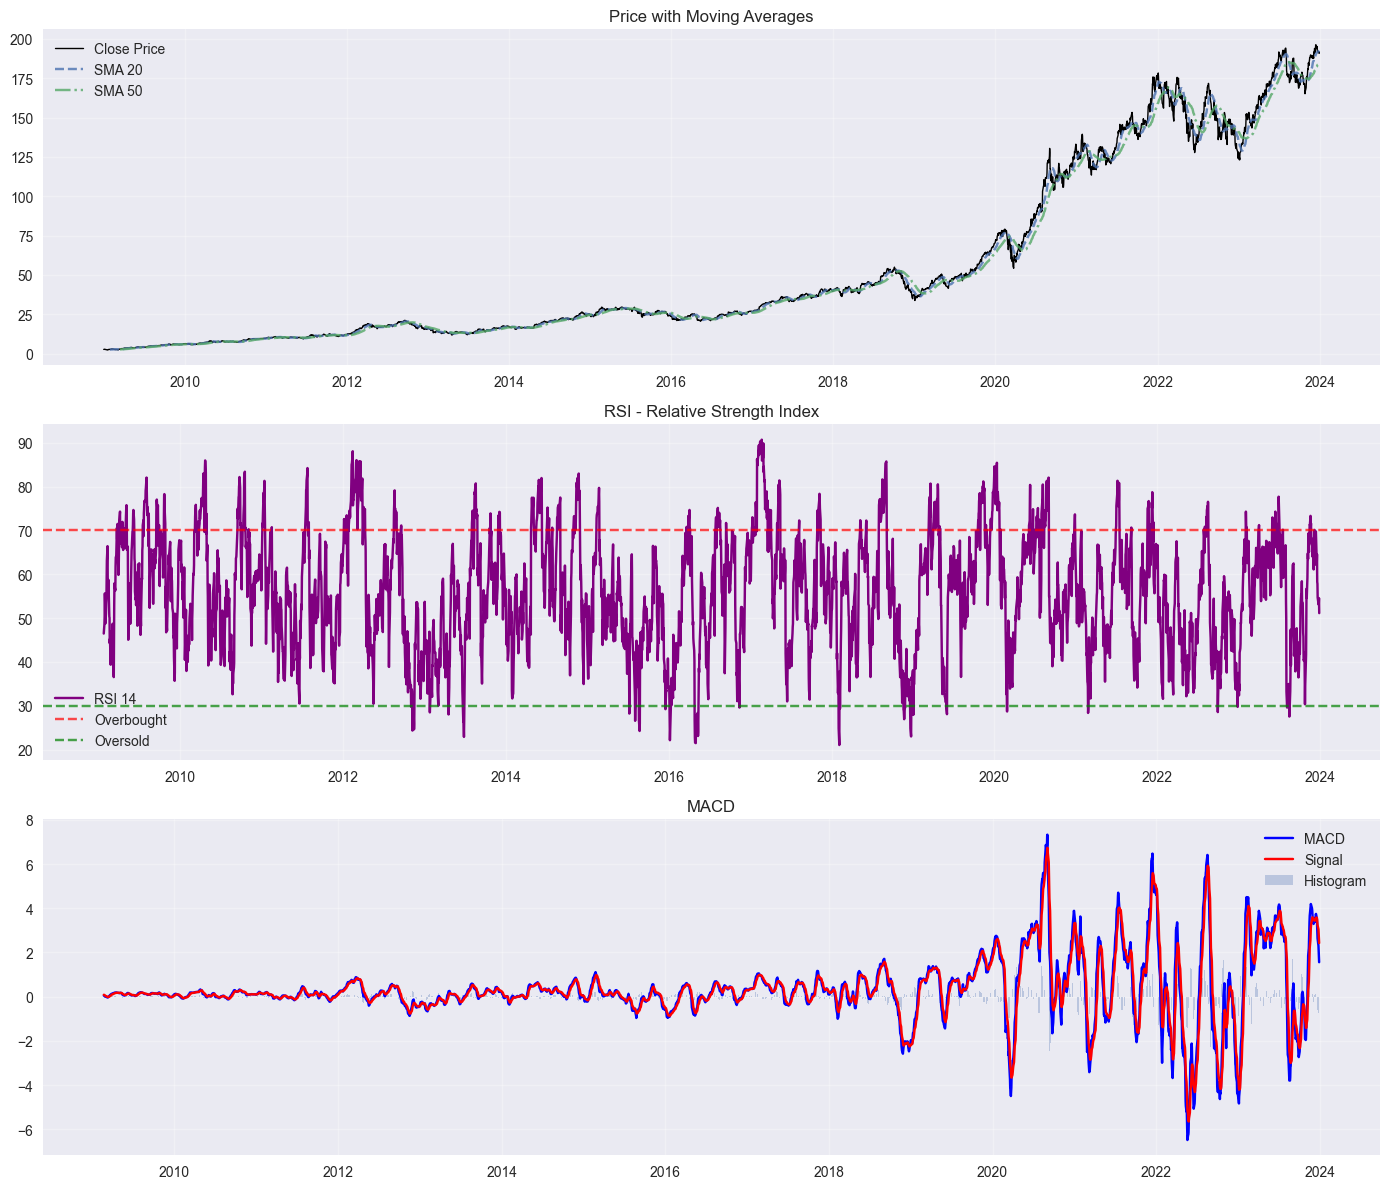

Creating volume analysis chart...


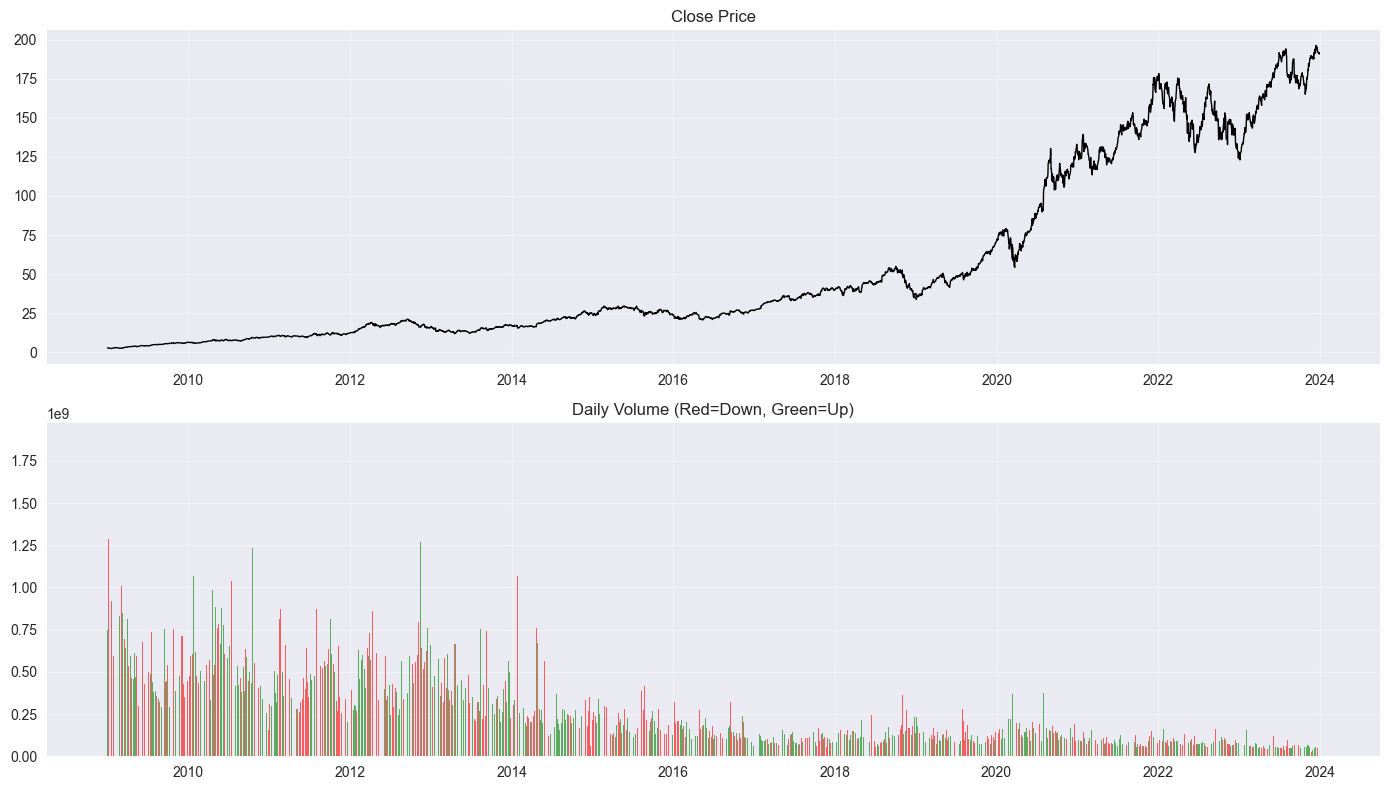

Creating returns analysis chart...


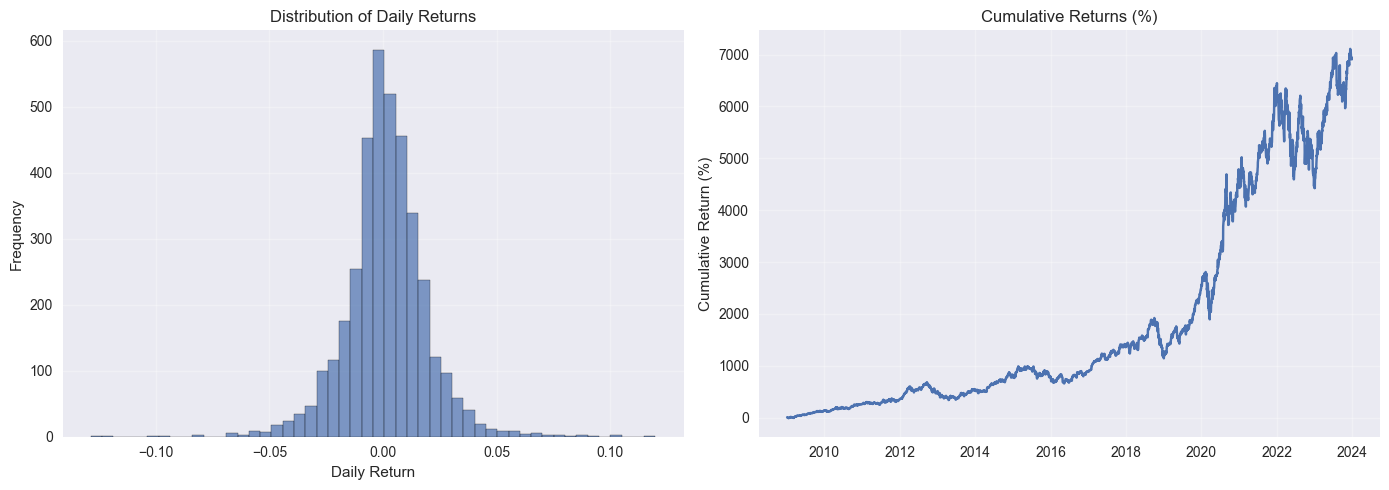

Creating correlation heatmap...


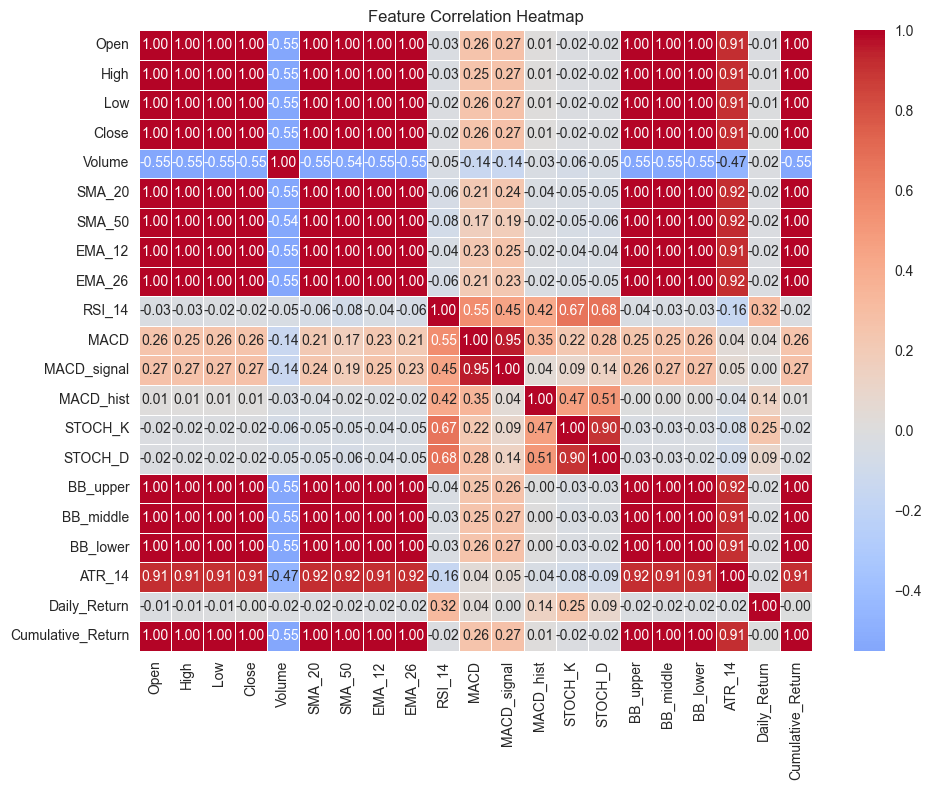

In [15]:

visualizer = FinancialVisualizer(data_with_indicators)

# Create all visualizations
print("Creating price indicators chart...")
visualizer.plot_price_indicators()

print("Creating volume analysis chart...")
visualizer.plot_volume_analysis()

print("Creating returns analysis chart...")
visualizer.plot_returns_analysis()

print("Creating correlation heatmap...")
visualizer.plot_correlation_heatmap()

In [ ]:
portfolio_tickers =  ["AAPL", "MSFT", "META", "NVDA","TSLA"]

portfolio_analyzer = PortfolioAnalyzer(portfolio_tickers)

if portfolio_analyzer.initialize_portfolio():
    print(" Portfolio analyzer initialized successfully!")
    
    # Get max Sharpe portfolio
    max_sharpe = portfolio_analyzer.get_max_sharpe_portfolio()
    if max_sharpe is not None:
        print("\n=== Max Sharpe Portfolio ===")
        print(max_sharpe)
    
    # Get min variance portfolio
    min_var = portfolio_analyzer.get_min_variance_portfolio()
    if min_var is not None:
        print("\n=== Min Variance Portfolio ===")
        print(min_var)
    
    # Get portfolio weights
    weights = portfolio_analyzer.get_portfolio_weights('max_sharpe')
    if weights is not None:
        print("\n=== Portfolio Weights (Max Sharpe) ===")
        print(weights.head())
else:
    print(" Portfolio analyzer not available. Make sure PyNance is installed and you have data for the tickers.")

c:\Users\Acer\Documents\KAIM_PROJECT\TEST\Stock-market-analysis-project\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Acer\Documents\KAIM_PROJECT\TEST\Stock-market-analysis-project\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Acer\Documents\KAIM_PROJECT\TEST\Stock-market-analysis-project\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions i

Portfolio analyzer initialized
✅ Portfolio analyzer initialized successfully!

=== Max Sharpe Portfolio ===
                   Max Sharpe Portfolio
Expected Return                  83.12%
Standard Deviation               47.26%

=== Min Variance Portfolio ===
                   Min Var Portfolio
Expected Return               20.24%
Standard Deviation            20.33%

=== Portfolio Weights (Max Sharpe) ===
     Portfolio Weight
AAPL           10.22%
MSFT            0.00%
META            0.00%
NVDA           89.78%
TSLA            0.00%
